# Exploration of possible strategies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")

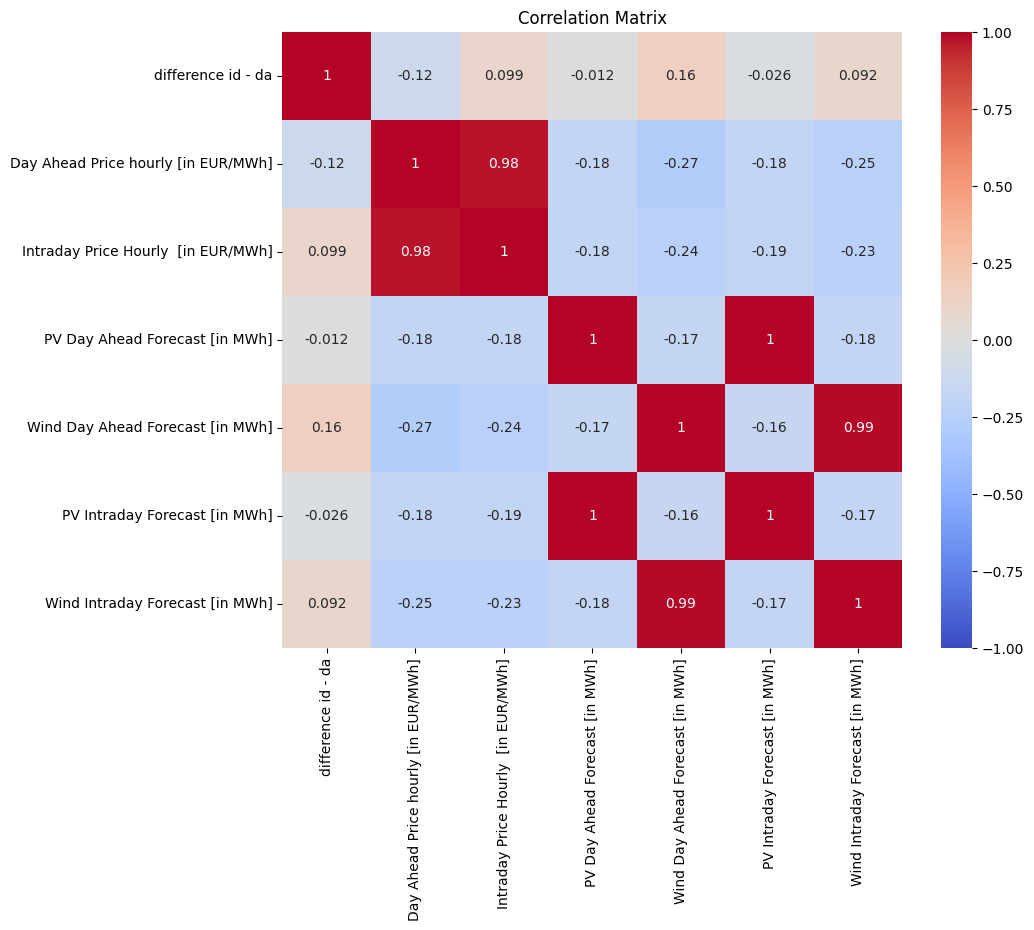

In [9]:
df["difference id - da"] = df["Intraday Price Hourly  [in EUR/MWh]"] - df["Day Ahead Price hourly [in EUR/MWh]"]

# Select relevant columns for correlation matrix
correlation_columns = [
    "difference id - da",
    "Day Ahead Price hourly [in EUR/MWh]",
    "Intraday Price Hourly  [in EUR/MWh]",
    "PV Day Ahead Forecast [in MWh]",
    "Wind Day Ahead Forecast [in MWh]",
    "PV Intraday Forecast [in MWh]",
    "Wind Intraday Forecast [in MWh]"
]

# Calculate correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [18]:
# Convert the 'time' column to datetime format
df["time"] = pd.to_datetime(df["time"])

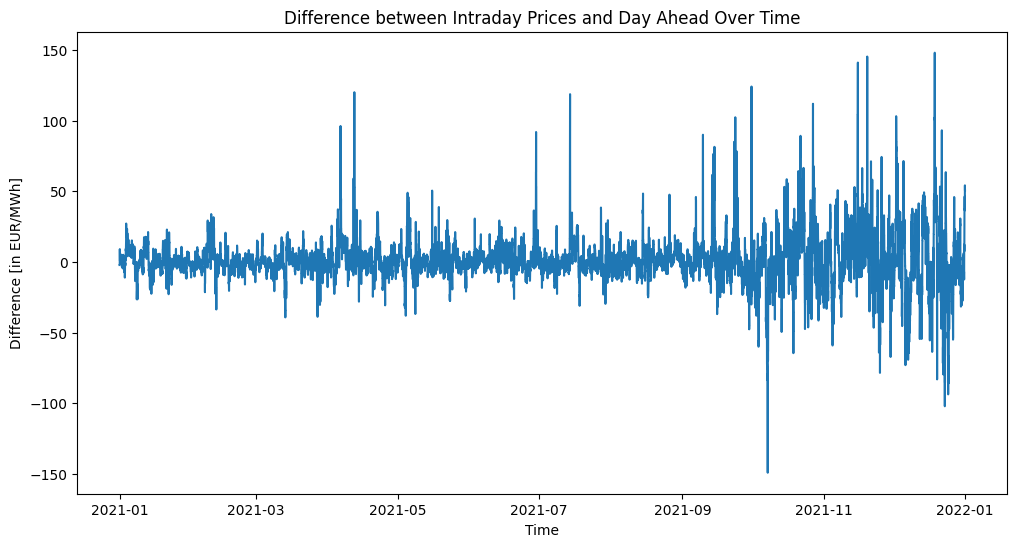

In [19]:
# Plot the difference between Day Ahead and Intraday prices over time
plt.figure(figsize=(12, 6))
plt.plot(df["time"], df["difference id - da"], label="Difference ID - DA [in EUR/MWh]")
plt.xlabel("Time")
plt.ylabel("Difference [in EUR/MWh]")
plt.title("Difference between Intraday Prices and Day Ahead Over Time")
plt.show()


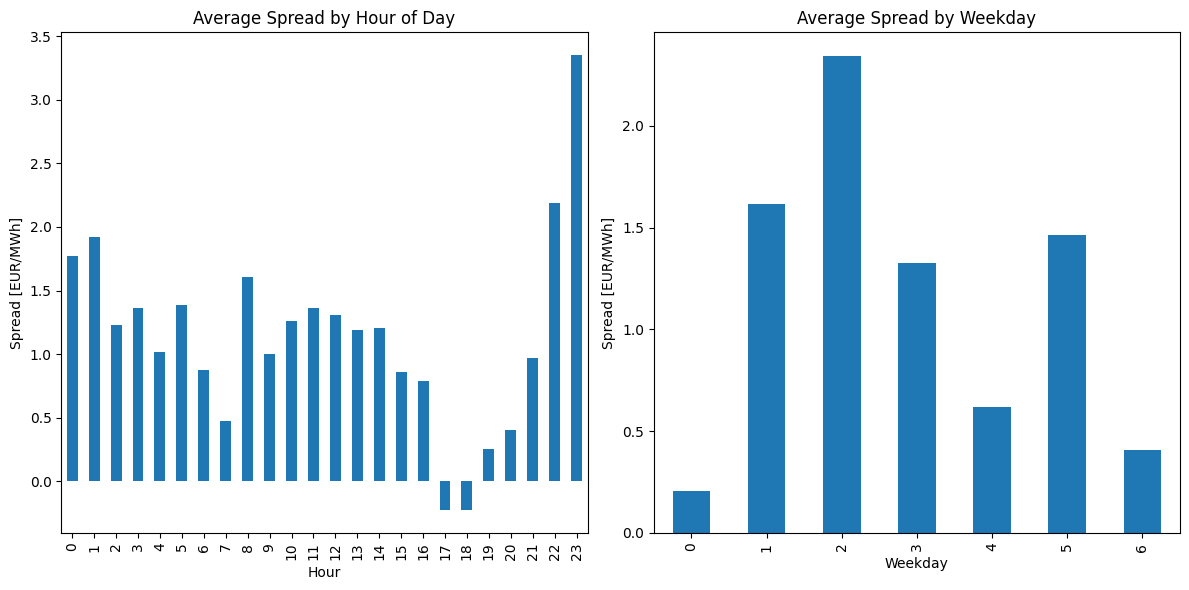

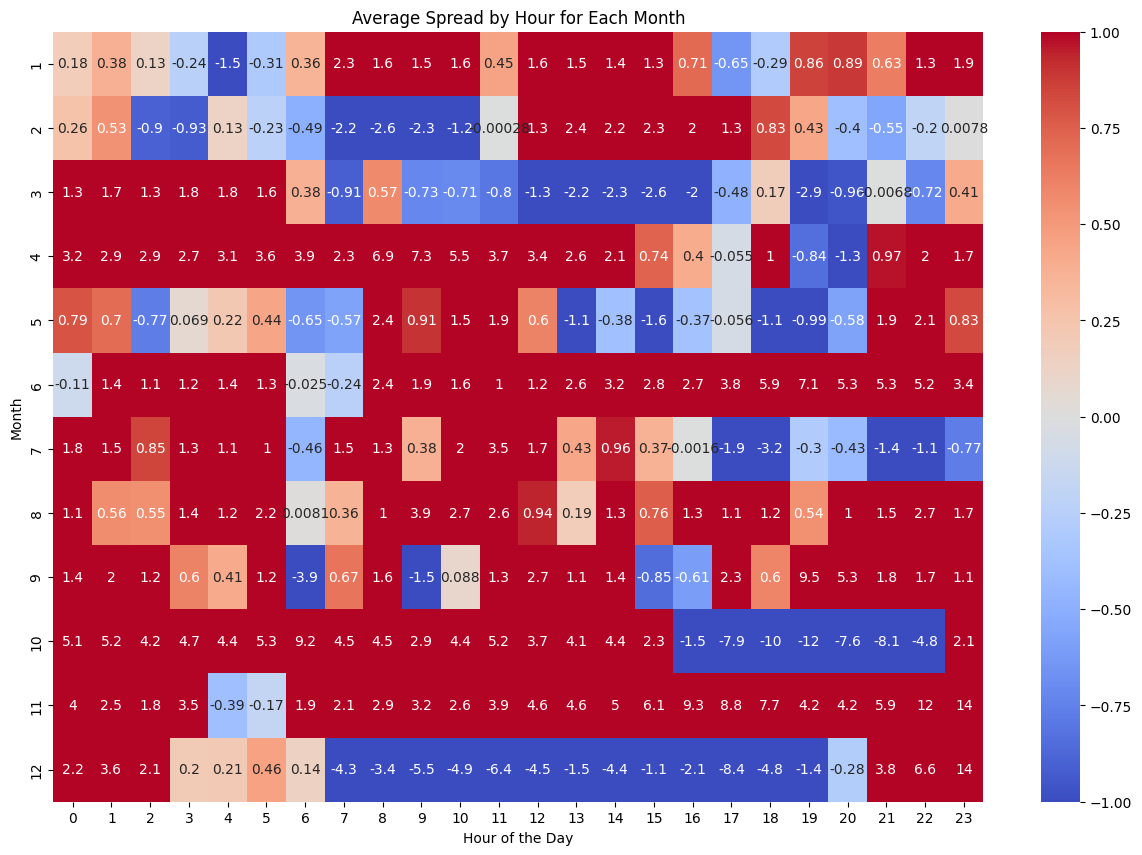

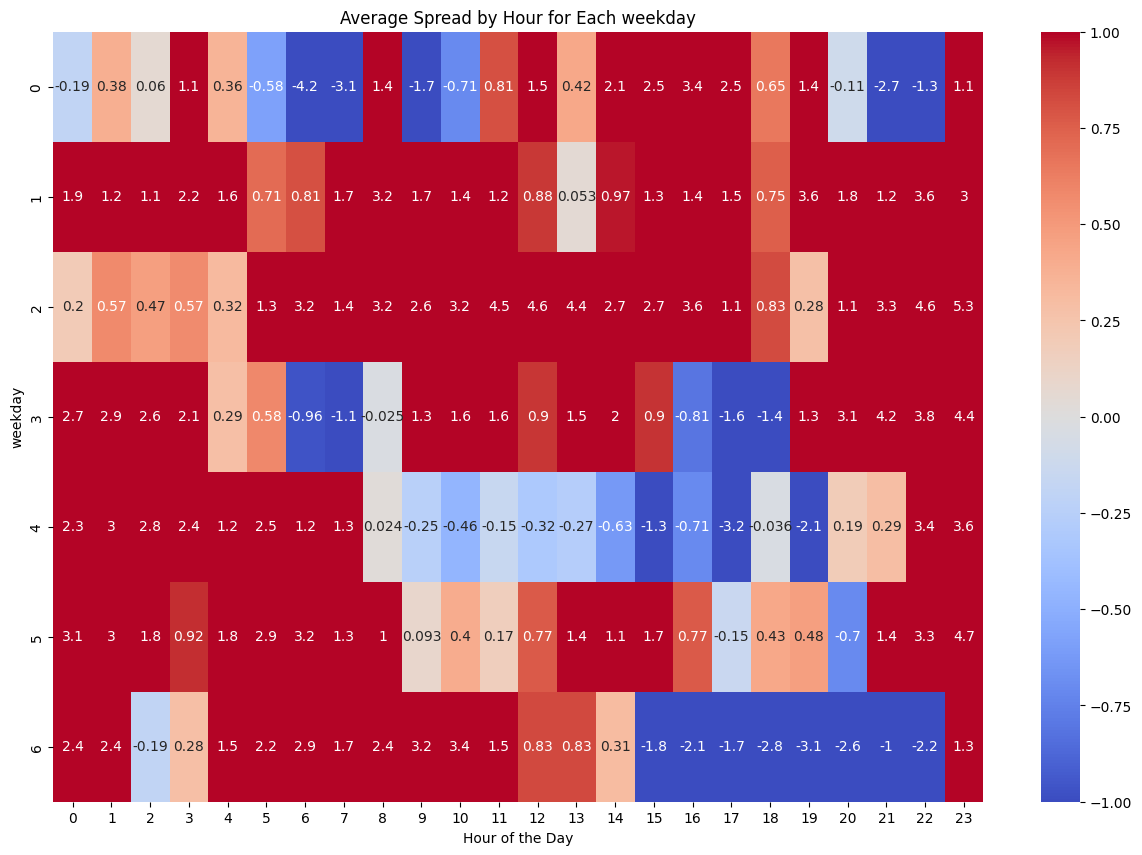

In [20]:
df["weekday"] = df["time"].dt.weekday
df["weekend"] = df["time"].dt.weekday.isin([5, 6])
df["month"] = df["time"].dt.month

avg_spread_by_hour = df.groupby("hour")["difference id - da"].mean()
avg_spread_by_weekday = df.groupby("weekday")["difference id - da"].mean()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
avg_spread_by_hour.plot(kind="bar", title="Average Spread by Hour of Day", xlabel="Hour", ylabel="Spread [EUR/MWh]")
plt.subplot(1, 2, 2)
avg_spread_by_weekday.plot(kind="bar", title="Average Spread by Weekday", xlabel="Weekday", ylabel="Spread [EUR/MWh]")
plt.tight_layout()
plt.show()

# Calculate the average spread per hour for each month
avg_spread_by_hour_month = df.groupby(["month", "hour"])["difference id - da"].mean().unstack()

# Plot the average spread per hour for each month
plt.figure(figsize=(15, 10))
sns.heatmap(avg_spread_by_hour_month, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Average Spread by Hour for Each Month")
plt.xlabel("Hour of the Day")
plt.ylabel("Month")
plt.show()

# calculate the average spread per hour for each weekday
avg_spread_by_hour_weekday = df.groupby(["weekday", "hour"])["difference id - da"].mean().unstack()

# plot the average spread per hour for each weekday
plt.figure(figsize=(15, 10))
sns.heatmap(avg_spread_by_hour_weekday, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Average Spread by Hour for Each weekday")
plt.xlabel("Hour of the Day")
plt.ylabel("weekday")
plt.show()

In [ ]:
# Doesn't give good results

# Calculate correlation between day ahead forecasted PV/Wind and the spread
correlation_pv_spread = df["PV Day Ahead Forecast [in MWh]"].corr(df["difference id - da"])
correlation_wind_spread = df["Wind Day Ahead Forecast [in MWh]"].corr(df["difference id - da"])

print("Correlation between PV Day Ahead Forecast and Spread: ", correlation_pv_spread)
print("Correlation between Wind Day Ahead Forecast and Spread: ", correlation_wind_spread)

# Calculate correlation between day ahead forecast of PV and Wind against the Intraday values
df["difference PV da - id"] = df["PV Day Ahead Forecast [in MWh]"] - df["PV Intraday Forecast [in MWh]"]
df["difference Wind da - id"] = df["Wind Day Ahead Forecast [in MWh]"] - df["Wind Intraday Forecast [in MWh]"]

correlation_dif_pv_spread = df["difference PV id - da"].corr(df["difference id - da"])
correlation_dif_wind_spread = df["difference Wind id - da"].corr(df["difference id - da"])

print("Correlation between difference in PV id - da and Spread: ", correlation_dif_pv_spread)
print("Correlation between difference in Wind id - da and Spread: ", correlation_dif_wind_spread)


/tmp/ipykernel_10256/4091393753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strategy_df["strategy_profit"] = (strategy_df["Day Ahead Price hourly [in EUR/MWh]"] - strategy_df["Intraday Price Hourly  [in EUR/MWh]"]) * 100
/tmp/ipykernel_10256/4091393753.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strategy_df["cumulative_strategy_1_profit"] = strategy_df["strategy_profit"].cumsum()


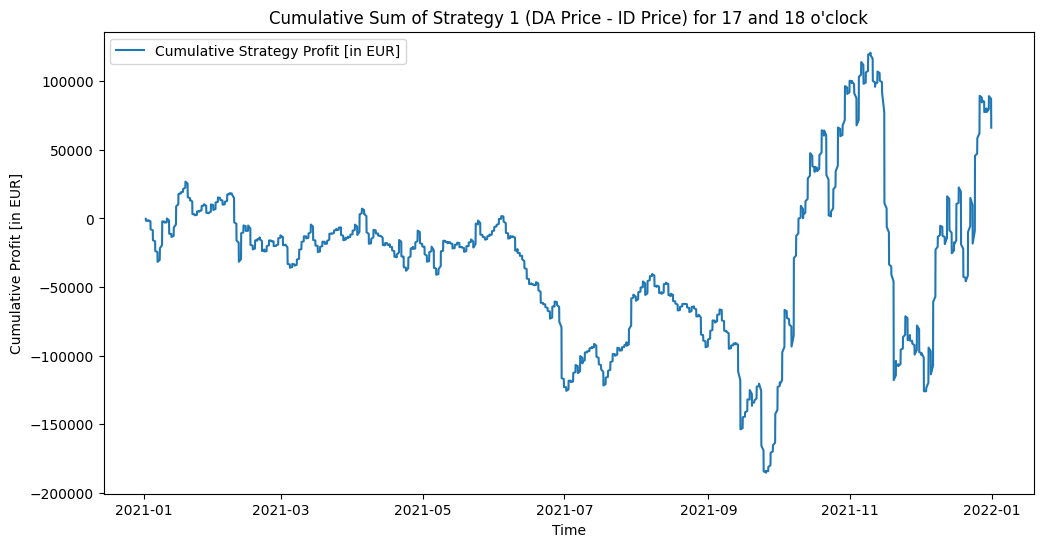

/tmp/ipykernel_10256/4091393753.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strategy_2_df["strategy_profit"] = (strategy_2_df["Day Ahead Price hourly [in EUR/MWh]"] - strategy_2_df["Intraday Price Hourly  [in EUR/MWh]"]) * 100
/tmp/ipykernel_10256/4091393753.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strategy_2_df["cumulative_strategy_2_profit"] = strategy_2_df["strategy_profit"].cumsum()


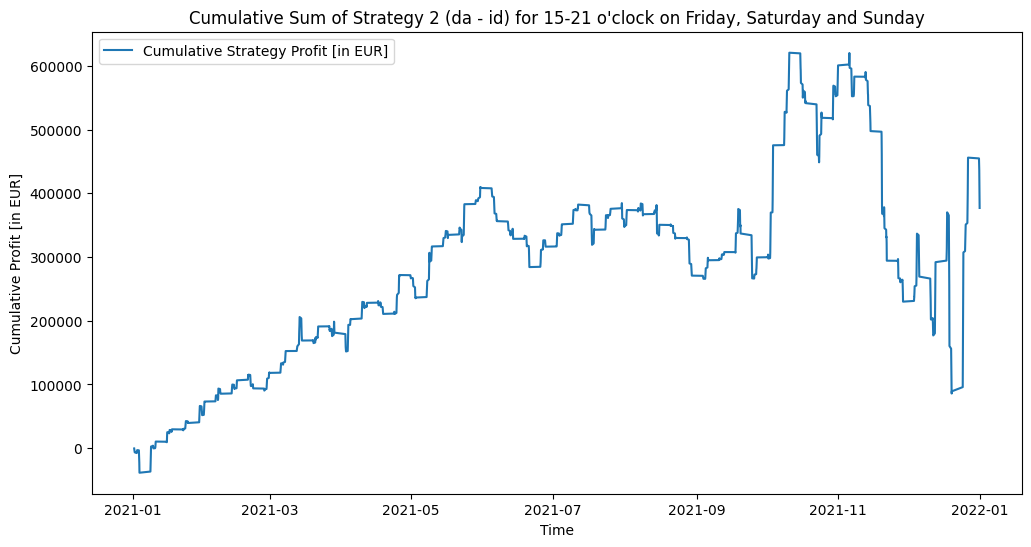

In [22]:
# Short selling

# Calculate the cumulative sum of the strategy (price day ahead - intraday price) for 17 and 18 o'clock
strategy_df = df[(df["hour"] == 17) | (df["hour"] == 18)]
strategy_df["strategy_profit"] = (strategy_df["Day Ahead Price hourly [in EUR/MWh]"] - strategy_df["Intraday Price Hourly  [in EUR/MWh]"]) * 100
strategy_df["cumulative_strategy_1_profit"] = strategy_df["strategy_profit"].cumsum()

# Plot the cumulative sum of the strategy
plt.figure(figsize=(12, 6))
plt.plot(strategy_df["time"], strategy_df["cumulative_strategy_1_profit"], label="Cumulative Strategy Profit [in EUR]")
plt.xlabel("Time")
plt.ylabel("Cumulative Profit [in EUR]")
plt.title("Cumulative Sum of Strategy 1 (DA Price - ID Price) for 17 and 18 o\'clock")
plt.legend()
plt.show()

# Calculate the cumulative sum of the strategy (price day ahead - intraday price) for 15-21 o'clock on friday, saturday and sunday
strategy_2_df = df[((df["hour"] >= 15) & (df["hour"] <= 21)) & (df["weekday"].isin([4, 5, 6]))]
strategy_2_df["strategy_profit"] = (strategy_2_df["Day Ahead Price hourly [in EUR/MWh]"] - strategy_2_df["Intraday Price Hourly  [in EUR/MWh]"]) * 100
strategy_2_df["cumulative_strategy_2_profit"] = strategy_2_df["strategy_profit"].cumsum()

# Plot the cumulative sum of the strategy
plt.figure(figsize=(12, 6))
plt.plot(strategy_2_df["time"], strategy_2_df["cumulative_strategy_2_profit"], label="Cumulative Strategy Profit [in EUR]")
plt.xlabel("Time")
plt.ylabel("Cumulative Profit [in EUR]")
plt.title("Cumulative Sum of Strategy 2 (da - id) for 15-21 o\'clock on Friday, Saturday and Sunday")
plt.legend()
plt.show()

In [ ]:
# Long 

